In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("HR_comma_sep.csv")
df

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low
...,...,...,...,...,...,...,...,...,...,...
14994,0.40,0.57,2,151,3,0,1,0,support,low
14995,0.37,0.48,2,160,3,0,1,0,support,low
14996,0.37,0.53,2,143,3,0,1,0,support,low
14997,0.11,0.96,6,280,4,0,1,0,support,low


In [3]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000


<Axes: >

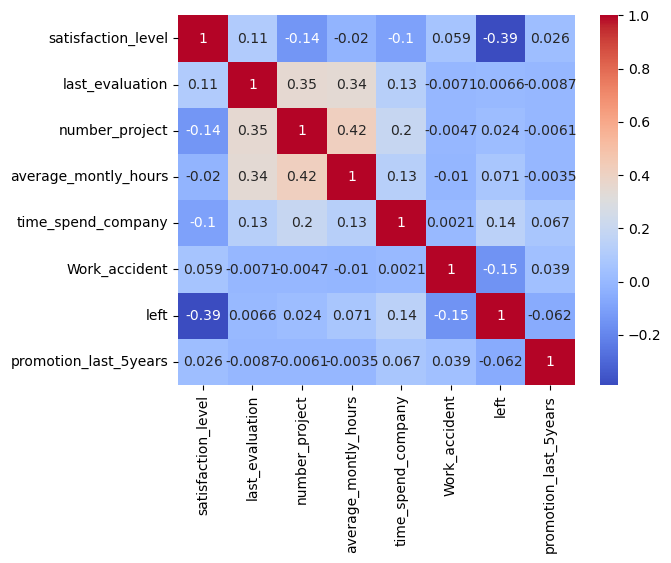

In [4]:
sns.heatmap(df.corr(),annot=True,cmap="coolwarm")

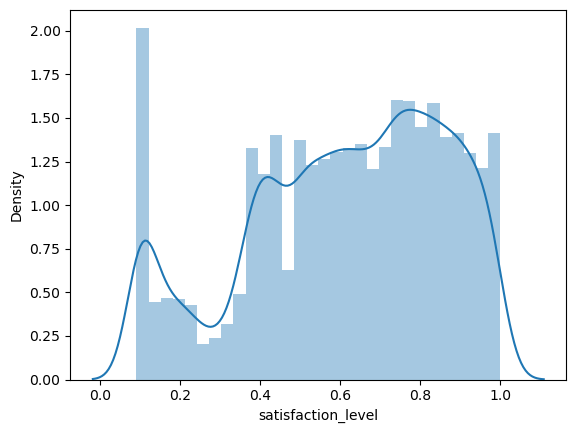

In [5]:
sns.distplot(df.satisfaction_level)
plt.show()

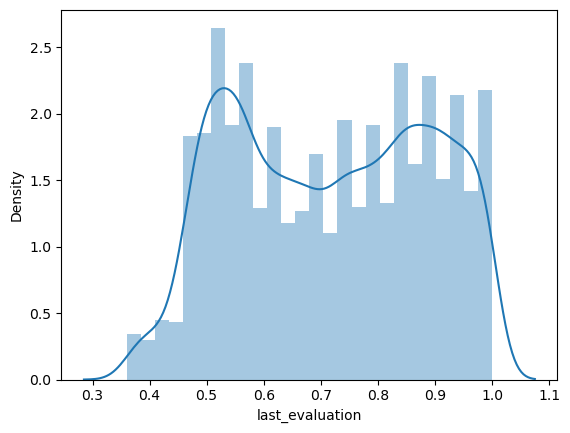

In [6]:
sns.distplot(df.last_evaluation)
plt.show()

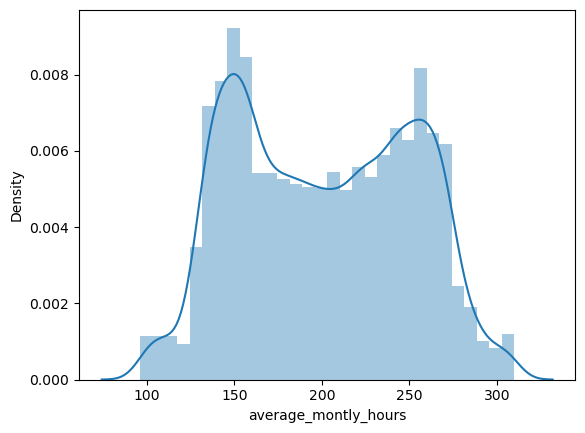

In [7]:
sns.distplot(df.average_montly_hours)
plt.show()

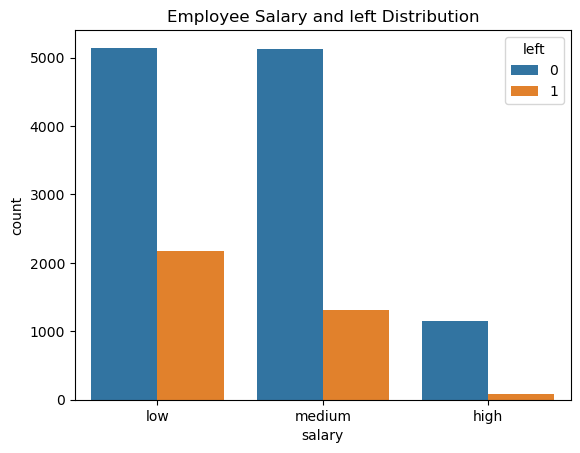

In [8]:
sns.countplot(x="salary", hue='left', data=df).set_title('Employee Salary and left Distribution')
plt.show()

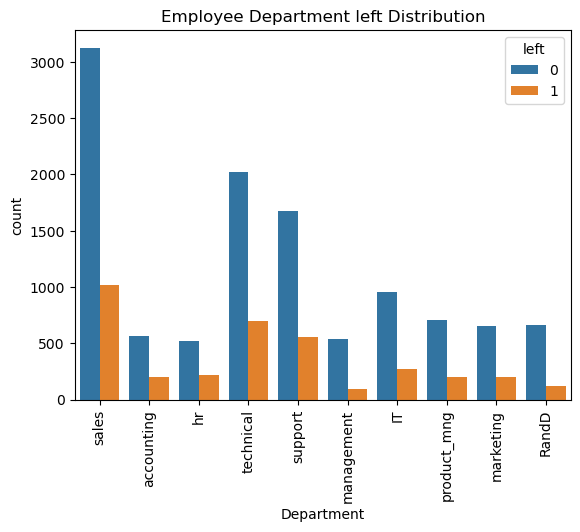

In [9]:
sns.countplot(x="Department", hue='left', data=df).set_title('Employee Department left Distribution')
plt.xticks(rotation=90)
plt.show()

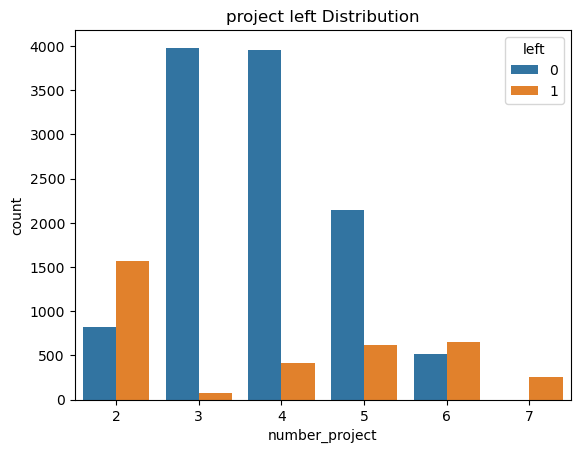

In [10]:
sns.countplot(x="number_project", hue='left', data=df).set_title('project left Distribution')
plt.show()

In [11]:
x=df.drop("left",axis=1)
y=df["left"]

In [12]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   promotion_last_5years  14999 non-null  int64  
 7   Department             14999 non-null  object 
 8   salary                 14999 non-null  object 
dtypes: float64(2), int64(5), object(2)
memory usage: 1.0+ MB


In [13]:
obj=x.select_dtypes("O").columns
fl=x.select_dtypes("int","float")

In [14]:
obj

Index(['Department', 'salary'], dtype='object')

In [15]:
fl

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years
0,2,157,3,0,0
1,5,262,6,0,0
2,7,272,4,0,0
3,5,223,5,0,0
4,2,159,3,0,0
...,...,...,...,...,...
14994,2,151,3,0,0
14995,2,160,3,0,0
14996,2,143,3,0,0
14997,6,280,4,0,0


In [16]:
from sklearn.preprocessing import OrdinalEncoder
oe=OrdinalEncoder()
x[obj]=oe.fit_transform(x[obj])
    

In [17]:
x=pd.concat([fl,x[obj]],axis=1)

In [18]:
x

,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,Department,salary
0,2,157,3,0,0,7.0,1.0
1,5,262,6,0,0,7.0,2.0
2,7,272,4,0,0,7.0,2.0
3,5,223,5,0,0,7.0,1.0
4,2,159,3,0,0,7.0,1.0
...,...,...,...,...,...,...,...
14994,2,151,3,0,0,8.0,1.0
14995,2,160,3,0,0,8.0,1.0
14996,2,143,3,0,0,8.0,1.0
14997,6,280,4,0,0,8.0,1.0


In [19]:
from sklearn.model_selection import train_test_split
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.25,random_state=3)

In [20]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression()
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)

In [21]:
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      2863
           1       0.00      0.00      0.00       887

    accuracy                           0.75      3750
   macro avg       0.38      0.49      0.43      3750
weighted avg       0.58      0.75      0.65      3750



In [22]:
#hypertuning with solver
logreg=LogisticRegression(solver="liblinear")
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      2863
           1       0.00      0.00      0.00       887

    accuracy                           0.75      3750
   macro avg       0.38      0.49      0.43      3750
weighted avg       0.58      0.75      0.65      3750



In [23]:
logreg=LogisticRegression(solver="newton-cg")
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      2863
           1       0.00      0.00      0.00       887

    accuracy                           0.75      3750
   macro avg       0.38      0.49      0.43      3750
weighted avg       0.58      0.75      0.65      3750



In [24]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
xtrain=sc.fit_transform(xtrain)
xtest=sc.transform(xtest)

In [25]:
logreg=LogisticRegression(solver="saga")
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      2863
           1       0.00      0.00      0.00       887

    accuracy                           0.75      3750
   macro avg       0.38      0.49      0.43      3750
weighted avg       0.58      0.75      0.65      3750



In [26]:
logreg=LogisticRegression(solver="sag")
logreg.fit(xtrain,ytrain)
ypred=logreg.predict(xtest)
from sklearn.metrics import classification_report
print(classification_report(ytest,ypred))

              precision    recall  f1-score   support

           0       0.76      0.98      0.86      2863
           1       0.00      0.00      0.00       887

    accuracy                           0.75      3750
   macro avg       0.38      0.49      0.43      3750
weighted avg       0.58      0.75      0.65      3750

